In [69]:
import pandas as pd
import networkx as nx
import itertools
import numpy as np
df = pd.read_csv("final_data_final.csv",sep=';',error_bad_lines=False,dtype = 'str')
print(df.dtypes)
df.head(10)

id                object
screenName        object
tags              object
avatar            object
followersCount    object
friendsCount      object
lang              object
lastSeen          object
tweetId           object
friends           object
dtype: object


,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
0,1969527638,LlngoMakeEmCum_,#nationaldogday,http://pbs.twimg.com/profile_images/5342862178...,319,112,en,"1,47227E+12","7,69311E+17","1969574754, 1969295556, 1969284056, 196961221..."
1,51878493,_notmichelle,#nationaldogday,http://pbs.twimg.com/profile_images/7619776021...,275,115,en,"1,47227E+12","7,69309E+17","60789485, 2420931980, 2899776756, 127410795, ..."
2,1393409100,jesseayye,#narcos,http://pbs.twimg.com/profile_images/7132829382...,120,107,en,"1,4728E+12","7,71623E+17","86868062, 19697415, 2998836604, 456295047, 74..."
3,232891415,MrBrianLloyd,#gloryoutnow,http://pbs.twimg.com/profile_images/1334406683...,492,325,en,"1,47227E+12","7,69308E+17","361335082, 1405248468, 24626354, 725675895965..."
4,"7,1013E+17",sarahdorat_16,#nationaldogday,http://pbs.twimg.com/profile_images/7671805202...,128,218,en,"1,47227E+12","7,6931E+17","1571896093, 768938323612008448, 2548665930, 3..."
5,3649469655,wanderIustregui,#veranomtv2016,http://pbs.twimg.com/profile_images/7624008069...,479,131,en,"1,47274E+12","7,71341E+17","2401096388, 707864762, 4096348512, 7638558599..."
6,99769502,andhesonit,felipe massa,http://pbs.twimg.com/profile_images/2750403044...,1875,111,en,"1,47273E+12","7,71322E+17","16874201, 223345936, 46893921, 130408348, 303..."
7,413415713,Jas_Thxku,#narcos,http://pbs.twimg.com/profile_images/7637257991...,582,281,en,"1,47281E+12","7,71633E+17","2353374818, 761568335138058240, 2395907958, 1..."
8,518053777,KLitzau,#nationaldogday,http://pbs.twimg.com/profile_images/7609112384...,688,186,en,"1,47227E+12","7,69306E+17","2432417994, 752203567382093824, 7421603779164..."
9,3167964531,ThePettyHomo,#nationaldogday,http://pbs.twimg.com/profile_images/7163857307...,204,226,en,"1,47227E+12","7,69308E+17","386533263, 3306591866, 3270679956, 7391488127..."


In [70]:
G = nx.Graph()

for i, row in df.iterrows():
        if i<100:
                tagArray = row['tags'].split(',')
                tagsCount = 0
                for tag in tagArray:
                        tagsCount += 1
                        userID = row['id']
                        G.add_edge(userID, tag, color='r', weight=1, hastag=row['tags'], node_size=1)
                        #if tagsCount > 1:
                           # print("{}/{}".format(tagsCount, len(tagArray)))
                #print('user completed')
print('All friends connected')

for i, row in df.iterrows():
     if i<0:
        friendsArray = row['friends'].split(',')
        friendsCount = 0
        for friend in friendsArray:
             friendsCount += 1
             userID = row['id']
             G.add_edge(userID, friend, color='r', weight=1, hastag=row['tags'], node_size=1)
             #print("{}/{}".format(friendsCount, len(friendsArray)))
        #print('user completed')
print('All friends connected')

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()
hastags = nx.get_edge_attributes(G,'hastag').values()
nodeSize = nx.get_edge_attributes(G,'node_size').values()


All friends connected
All friends connected


In [71]:
'''import matplotlib.pyplot as plt
plt.figure(figsize=(12,8), dpi= 150, facecolor='w', edgecolor='k')
#plt.subplot(211)
pos = nx.spring_layout(G,k=0.1)

nx.draw(G, pos,
        edge_color=colors,
        node_size = 50,
        width=list(weights),
        with_labels=False,
        node_color='lightgreen')
plt.show()'''

"import matplotlib.pyplot as plt\nplt.figure(figsize=(12,8), dpi= 150, facecolor='w', edgecolor='k')\n#plt.subplot(211)\npos = nx.spring_layout(G,k=0.1)\n\nnx.draw(G, pos,\n        edge_color=colors,\n        node_size = 50,\n        width=list(weights),\n        with_labels=False,\n        node_color='lightgreen')\nplt.show()"

In [72]:
def set_node_community(G, communities):
        #Add community attributes
        for c, v_c in enumerate(communities):
            # print(v_c)
            for v in v_c:
                # Set community for each node
                # print(v)
                G.nodes[v]['community'] = c + 1

def get_color(i, r_off=1, g_off=1, b_off=1):
        #Assign a color to a vertex.
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)  
    
def set_edge_community(G):
        # Set internal/external edges attributes
        # f - From / t - To Index
        for f, t, in G.edges:
            if G.nodes[f]['community'] == G.nodes[t]['community']:
                G.edges[f, t]['community'] = G.nodes[f]['community']
            else:
                G.edges[f, t]['community'] = 0

In [73]:
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len)
#communities = next(nxcom.girvan_newman(G))

set_node_community(G, communities)
set_edge_community(G)

In [74]:
node_color = [get_color(G.nodes[i]['community']) for i in G.nodes]

external = [(f, t) for f, t in G.edges if G.edges[f, t]['community'] == 0]
internal = [(f, t) for f, t in G.edges if G.edges[f, t]['community'] > 0]
internal_color = [get_color(G.edges[i]['community']) for i in internal]

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8), dpi= 150, facecolor='w', edgecolor='k')

pos = nx.spring_layout(G,k=0.1, iterations=50)
#nx.kamada_kawai_layout(G)

<Figure size 1800x1200 with 0 Axes>

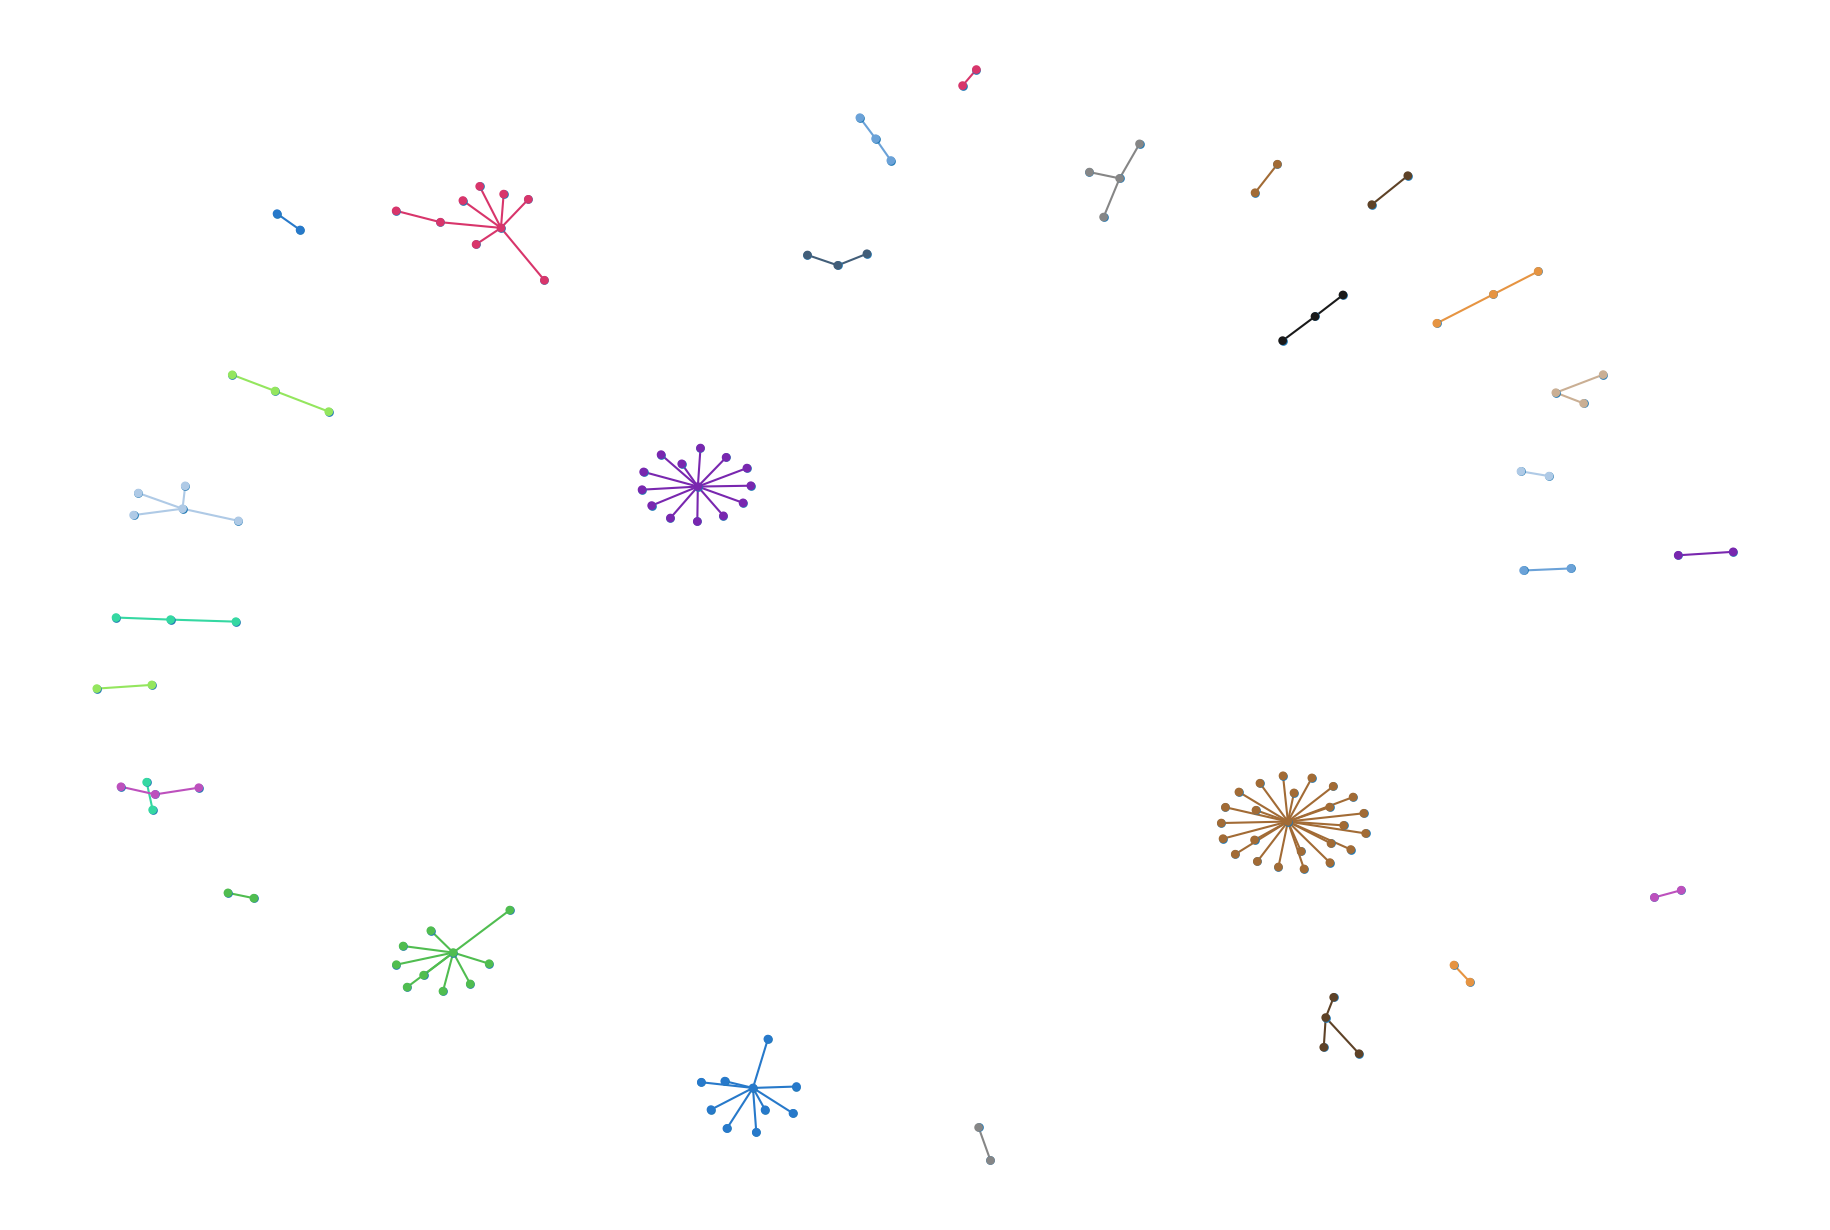

In [76]:
plt.figure(figsize=(12,8), dpi= 150, facecolor='w', edgecolor='k')

nx.draw(
        G, pos=pos, node_size=10,
        edgelist=external, edge_color="black", with_labels=False)
nx.draw(
        G, pos=pos, node_color=node_color, node_size = 10,
        edgelist=internal, edge_color=internal_color, with_labels=False)